#### Pratyush Kaushal 21BCE2198
#### Evening Slot 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Dataset

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Data preprocessing including visualization

### Checking Data correlation

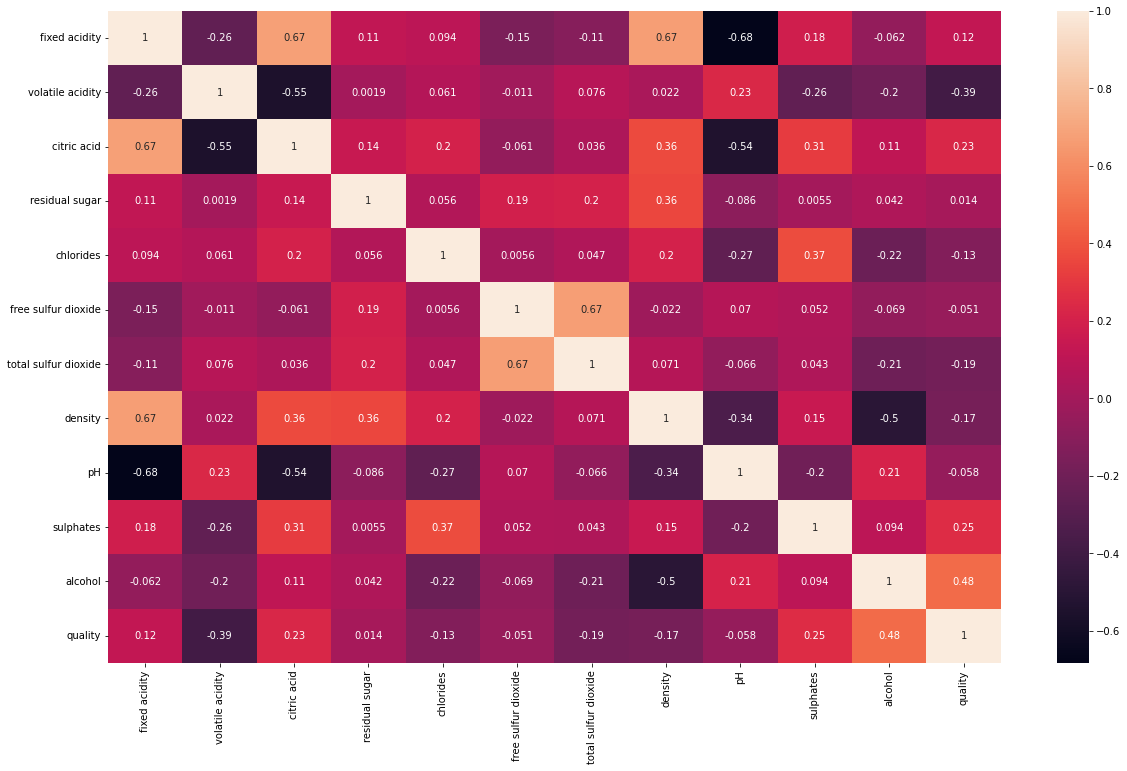

In [7]:
cor=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True)
plt.show()

In [8]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

### Outlier Detection

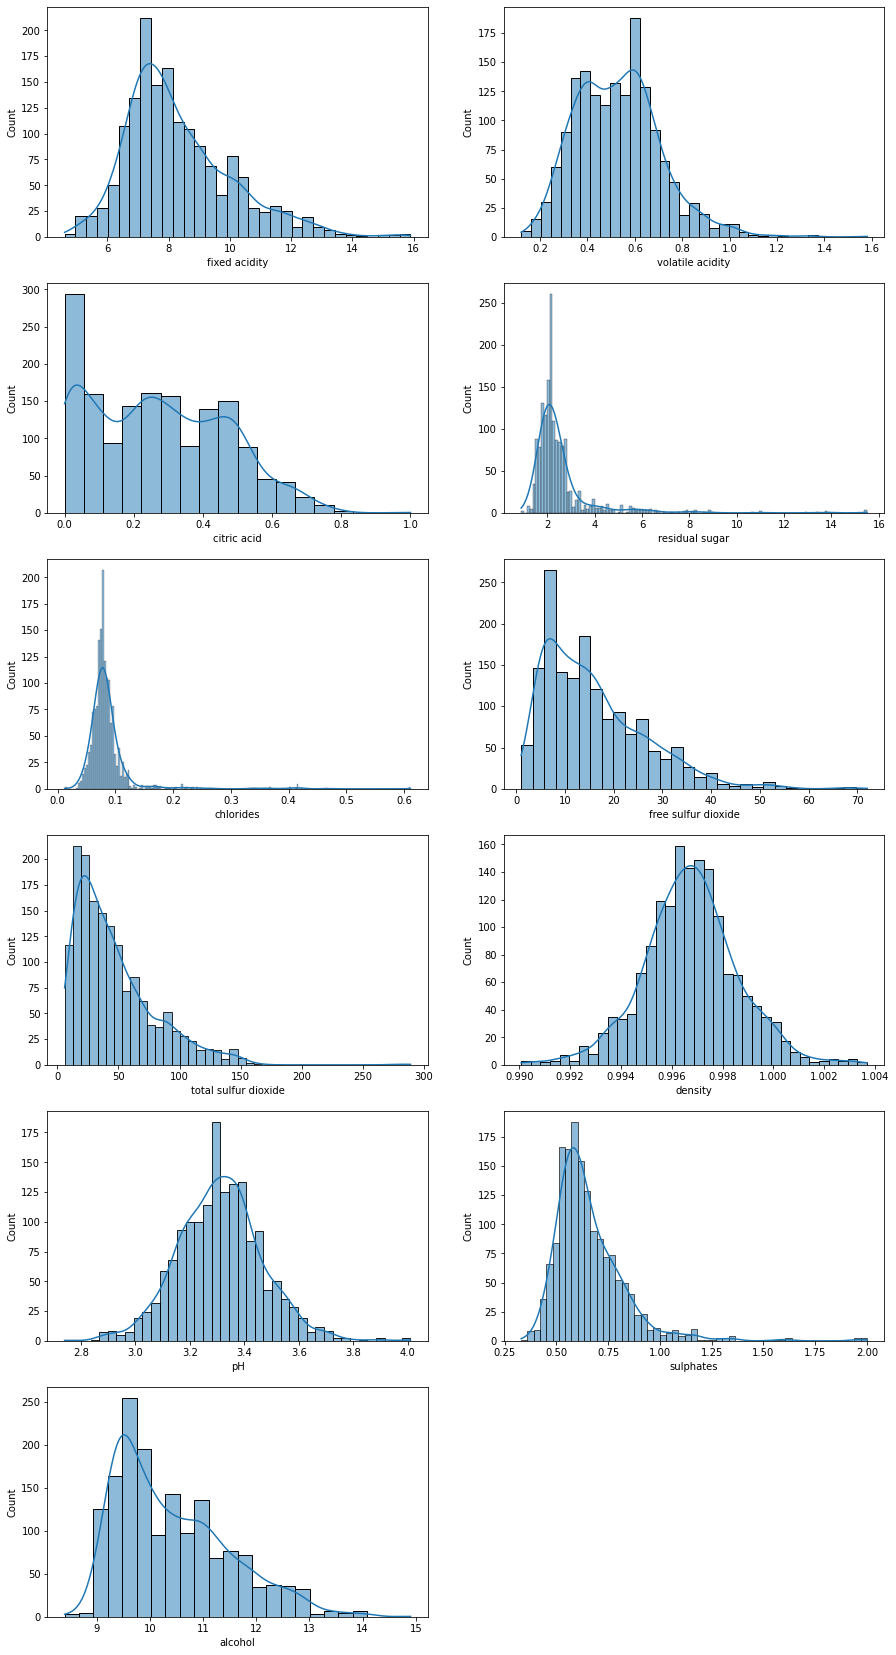

In [9]:
feature_col=df.columns
feature_col=feature_col.drop('quality')
num_columns=len(feature_col)
plt.figure(figsize=(15,5 * num_columns))
for i,column in enumerate(feature_col):
    plt.subplot(num_columns,2,i + 1)
    sns.histplot(df[column],kde=True)
plt.show()

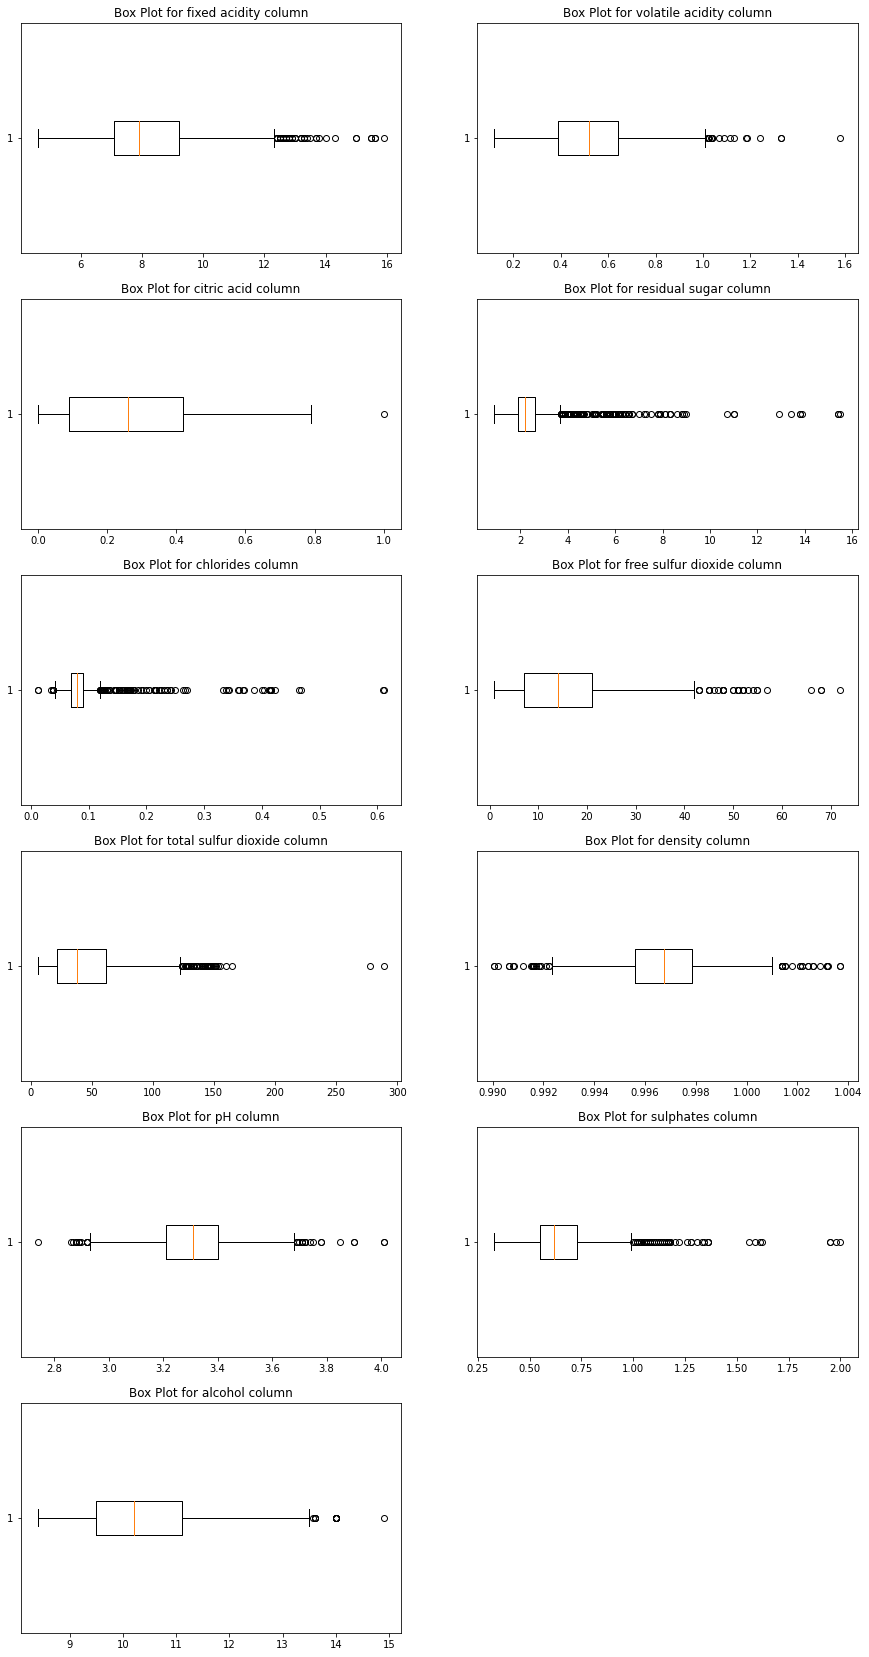

In [10]:
plt.figure(figsize=(15,5*num_columns))
for i,column in enumerate(feature_col):
    plt.subplot(num_columns,2,i+1)
    plt.boxplot(df[column],vert=False)
    plt.title('Box Plot for {} column'.format(column))
plt.show()

### Replacing outliers with median    

In [11]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
for column in feature_col:
    median=df[column].median()
    upperlimit=Q3[column]+1.5*IQR[column]
    lowerlimit=Q1[column]-1.5*IQR[column]
    df[column]=np.where(((df[column]>upperlimit)|(df[column]<lowerlimit)),median,df[column])

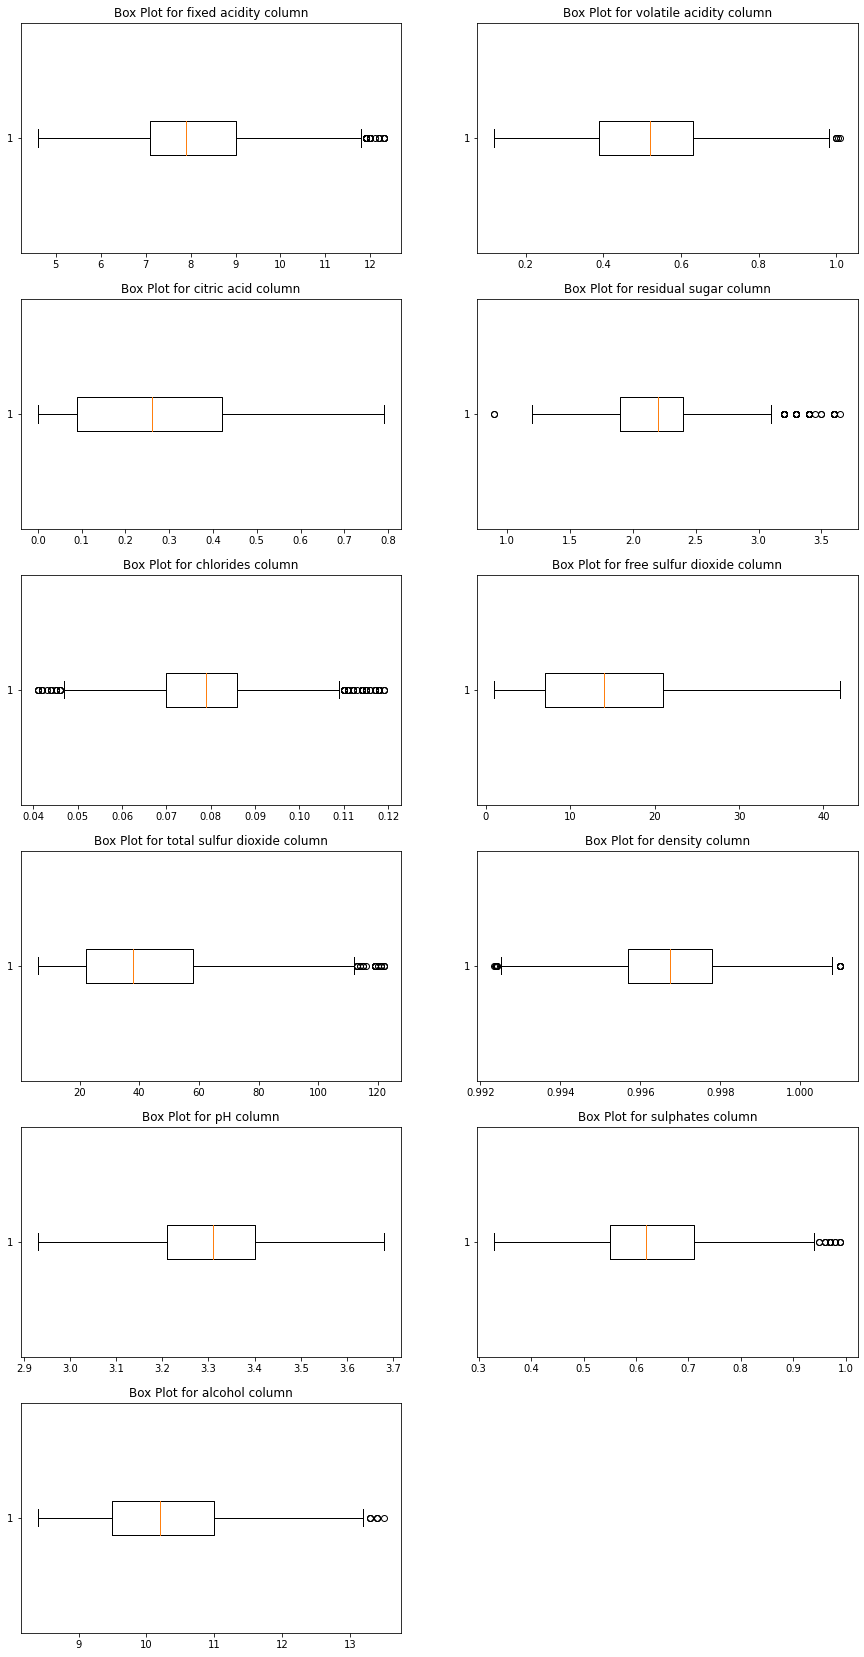

In [12]:
plt.figure(figsize=(15,5*num_columns))
for i,column in enumerate(feature_col):
    plt.subplot(num_columns,2,i+1)
    plt.boxplot(df[column],vert=False)
    plt.title('Box Plot for {} column'.format(column))
plt.show()

In [13]:
cor=df.corr()
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.464152
sulphates               0.385729
citric acid             0.232209
fixed acidity           0.109637
residual sugar          0.035506
free sulfur dioxide    -0.047187
pH                     -0.075837
chlorides              -0.162122
density                -0.164179
total sulfur dioxide   -0.168010
volatile acidity       -0.356247
Name: quality, dtype: float64

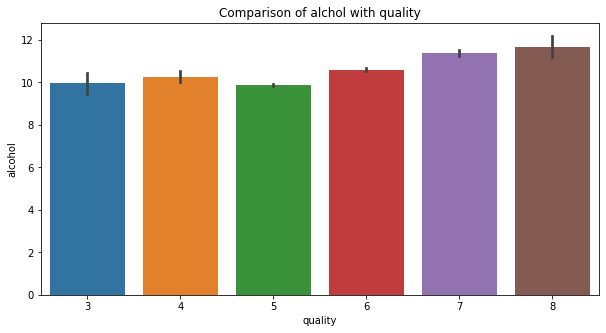

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='alcohol',data=df)
plt.title('Comparison of alchol with quality')
plt.show()

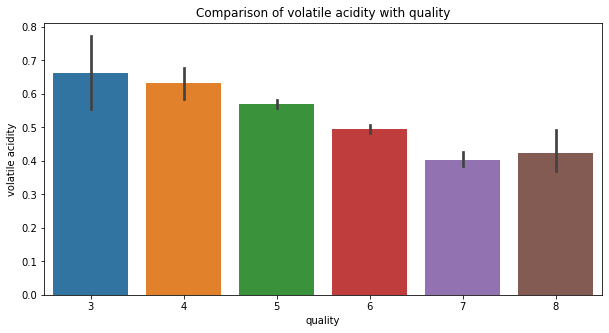

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.title('Comparison of volatile acidity with quality')
plt.show()

### Distribution of Quality of wine

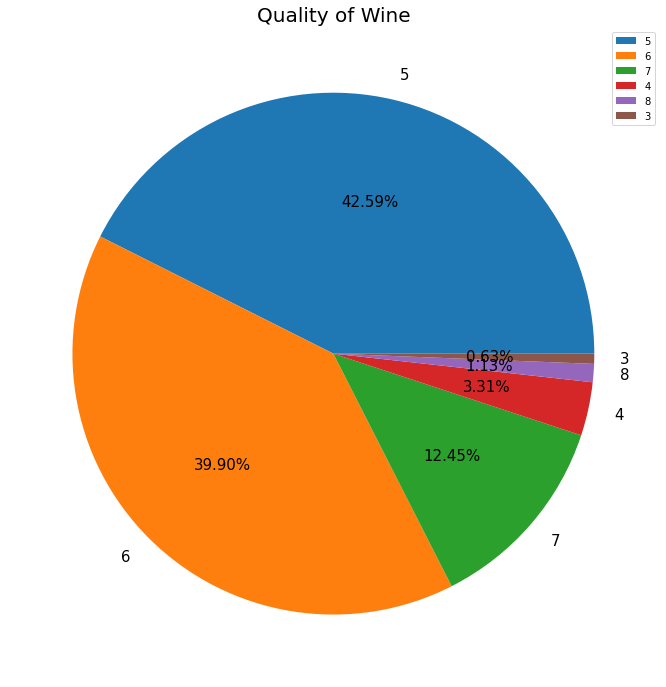

In [16]:
q_count=df['quality'].value_counts()
plt.figure(figsize=(12,12))
plt.title('Quality of Wine',fontdict={"fontsize":20})
plt.pie(q_count,labels=q_count.keys(),autopct='%.2f%%',textprops={"fontsize":15})
plt.legend()
plt.show()

## Our Data is Imbalanced

### Spliting Dataset

In [17]:
X=df.drop(['quality'],axis=1)
Y=df.quality

### Scaling Dataset

In [18]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=pd.DataFrame(mm.fit_transform(X),columns=X.columns)
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.363636,0.651685,0.000000,0.363636,0.448718,0.243902,0.241379,0.630058,0.773333,0.348485,0.196078
1,0.415584,0.853933,0.000000,0.618182,0.730769,0.585366,0.525862,0.514451,0.360000,0.530303,0.274510
2,0.415584,0.719101,0.050633,0.509091,0.653846,0.341463,0.413793,0.537572,0.440000,0.484848,0.274510
3,0.857143,0.179775,0.708861,0.363636,0.435897,0.390244,0.465517,0.653179,0.306667,0.378788,0.274510
4,0.363636,0.651685,0.000000,0.363636,0.448718,0.243902,0.241379,0.630058,0.773333,0.348485,0.196078
5,0.363636,0.606742,0.000000,0.327273,0.435897,0.292683,0.293103,0.630058,0.773333,0.348485,0.196078
6,0.428571,0.539326,0.075949,0.254545,0.358974,0.341463,0.456897,0.468208,0.493333,0.196970,0.196078
7,0.350649,0.595506,0.000000,0.109091,0.307692,0.341463,0.129310,0.260116,0.613333,0.212121,0.313725
8,0.415584,0.516854,0.025316,0.400000,0.410256,0.195122,0.103448,0.514451,0.573333,0.363636,0.215686
9,0.376623,0.426966,0.455696,0.472727,0.384615,0.390244,0.827586,0.630058,0.560000,0.712121,0.411765


### Splitting into train and test

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (1279, 11)
Shape of x_test: (320, 11)
Shape of y_train: (1279,)
Shape of y_test: (320,)


In [21]:
y_train.value_counts()

quality
5    546
6    496
7    172
4     42
8     15
3      8
Name: count, dtype: int64

### Our Data is highly imbalnced, We need to balance it

In [22]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=6)
x_train_sampled,y_train_sampled=sm.fit_resample(x_train,y_train)

In [23]:
y_train_sampled.value_counts()

quality
5    546
8    546
6    546
7    546
4    546
3    546
Name: count, dtype: int64

In [24]:
print('Shape of balanced x_train:',x_train_sampled.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of balanced y_train:',y_train_sampled.shape)
print('Shape of y_test:',y_test.shape)

Shape of balanced x_train: (3276, 11)
Shape of x_test: (320, 11)
Shape of balanced y_train: (3276,)
Shape of y_test: (320,)


# Model building

### Classification Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(criterion='entropy',max_features='log2')
model_forest.fit(x_train_sampled,y_train_sampled)

RandomForestClassifier(criterion='entropy', max_features='log2')

In [ ]:
from sklearn.metrics import accuracy_score
pred_test=model_forest.predict(x_test)
pred_train=model_forest.predict(x_train_sampled)
print('Test Accuracy:',accuracy_score(pred_test,y_test))
print('Train Accuracy:',accuracy_score(pred_train,y_train_sampled))

Test Accuracy: 0.6625
Train Accuracy: 1.0


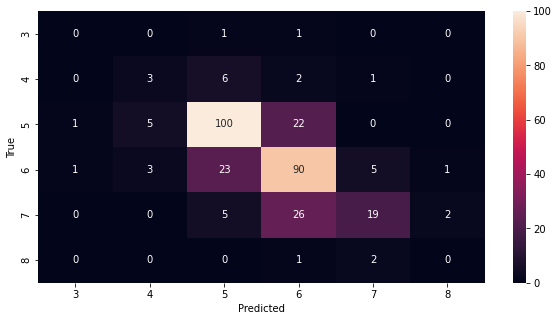

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred_test,y_test)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=[3,4,5,6,7,8],yticklabels=[3,4,5,6,7,8])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(pred_test,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.27      0.25      0.26        12
           5       0.74      0.78      0.76       128
           6       0.63      0.73      0.68       123
           7       0.70      0.37      0.48        52
           8       0.00      0.00      0.00         3

    accuracy                           0.66       320
   macro avg       0.39      0.35      0.36       320
weighted avg       0.66      0.66      0.65       320



## Regression Model

#### k Neighbour Regressor



In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
forest_reg_model=RandomForestRegressor(n_estimators=500)
forest_reg_model.fit(x_train_sampled,y_train_sampled)
neighbour_reg_model=KNeighborsRegressor()
neighbour_reg_model.fit(x_train_sampled,y_train_sampled)

KNeighborsRegressor()

In [30]:
y_pred=forest_reg_model.predict(x_test)
y_pred_neighbor=neighbour_reg_model.predict(x_test)

In [31]:
from sklearn.metrics import r2_score
print("R2 score of Random Forest:",r2_score(y_test,y_pred))
print("R2 score of KNN:",r2_score(y_test,y_pred_neighbor))

R2 score of Random Forest: 0.3921797065847833
R2 score of KNN: -0.3393926987376321


In [32]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error of Random Forest:",mean_absolute_error(y_test,y_pred))
print("Mean absolute error of KNN:",mean_absolute_error(y_test,y_pred_neighbor))

Mean absolute error of Random Forest: 0.43486250000000004
Mean absolute error of KNN: 0.65


# Bad quality alcohol.